In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

<function matplotlib.pyplot.show>

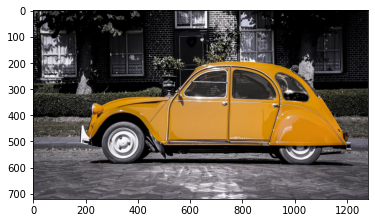

In [2]:
img = plt.imread("/content/car.jpg")
plt.imshow(img)
plt.show

#Another Approach to import image using cv2

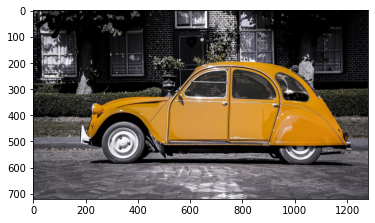

In [4]:
img1 = cv2.imread("/content/car.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

#Converting into 1d array


In [5]:
img.shape

(720, 1280, 3)

In [6]:
all_pixels = img.reshape(720*1280,3)
all_pixels.shape

(921600, 3)

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,n_jobs =  -1)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Extracting Pixel values of centres

In [38]:
centre = km.cluster_centers_
centre

array([[ 96.89101706,  93.0834155 ,  95.82720557],
       [ 15.68100085,  14.92449737,  15.16041648],
       [203.10591264, 160.54427144,  97.59698481]])

#Converting centres into integers

In [39]:
centre = np.array(centre,dtype = 'uint')
centre

array([[ 96,  93,  95],
       [ 15,  14,  15],
       [203, 160,  97]], dtype=uint64)

In [40]:
km.labels_.shape

(921600,)

In [41]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([317413, 375702, 228485]))

#Creating our own Image

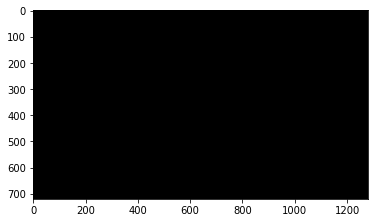

In [42]:
new_img = np.zeros((921600, 3),dtype='uint')
plt.imshow(new_img.reshape(720,1280,3))
plt.show()

#Changing pixel values according to cluster

In [0]:
for i in range(new_img.shape[0]):
  new_img[i] =  centre[km.labels_[i]]

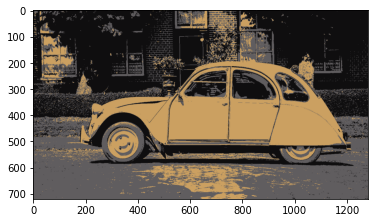

In [44]:
plt.imshow(new_img.reshape(720,1280,3))
plt.show()